# 灰度图像直方图均值化

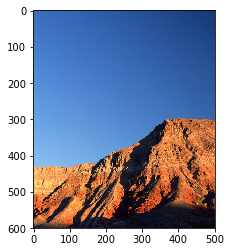

In [20]:
from PIL import Image
from pylab import *

I = Image.open('./IMAGE/Mountain.png')
imshow(I)

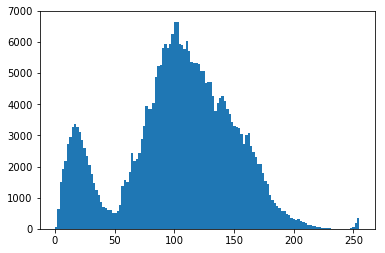

In [21]:
im = array(I.convert('L'))
hist(im.flatten(), 128)
show()

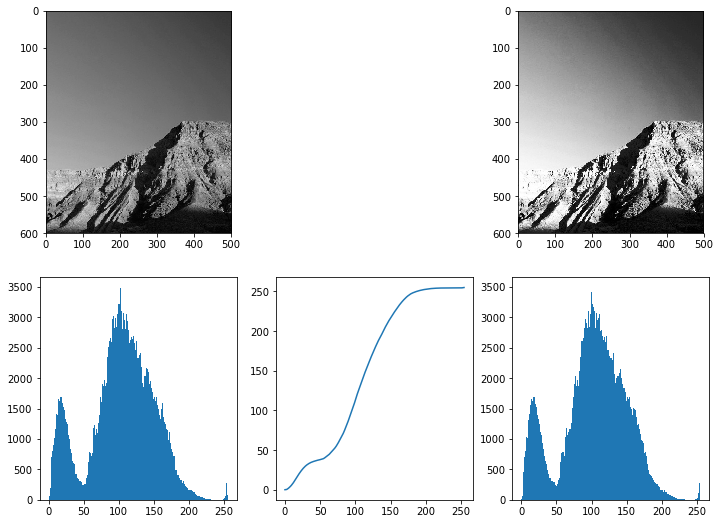

In [23]:
figure(figsize=(12,9))
subplot(234)

hist(im.flatten(), 256)

imhist, bins = histogram(im.flatten(), 256, normed=True)

cdf = imhist.cumsum()
cdf = cdf*255/cdf[-1]

subplot(235)
plot(bins[:256], cdf)

im2 = interp(im.flatten(), bins[:256], cdf)
im2 = im2.reshape(im.shape)

subplot(236)
hist(im.flatten(), 256)
gray()

subplot(231)
imshow(im)

subplot(233)
imshow(im2)

# 彩色图像直方图均值化

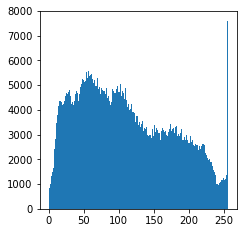

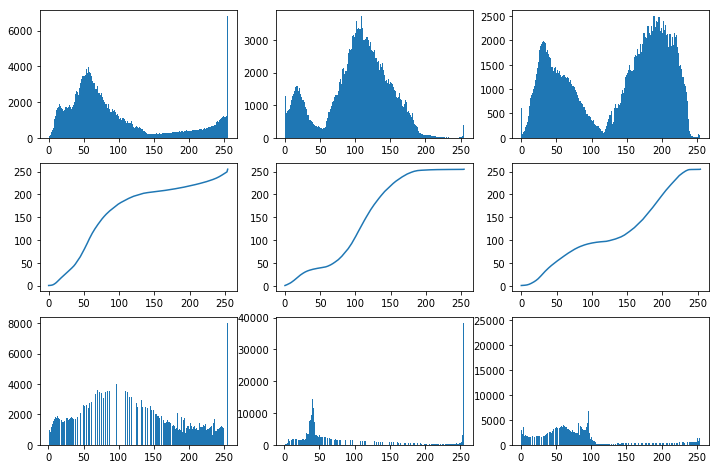

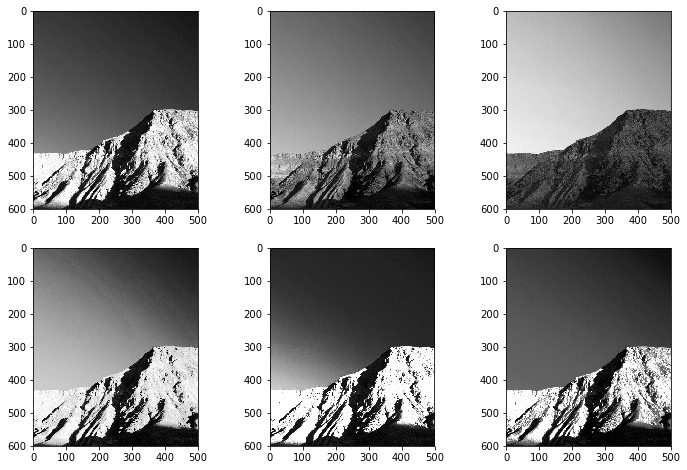

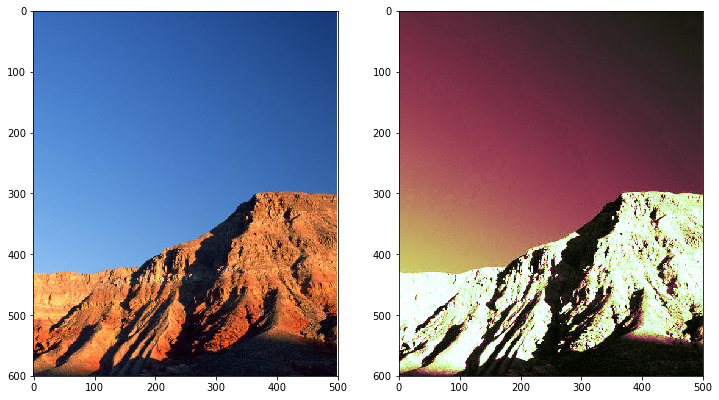

In [42]:
im = array(Image.open('./IMAGE/Mountain.png'))

r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

figure(figsize=(12,8))
subplot(231)
hist(im.flatten(), 256)

figure(figsize=(12,8))
# 计算各通道直方图
imhist_r, bins_r = histogram(r, 256, normed=True)
imhist_g, bins_g = histogram(g, 256, normed=True)
imhist_b, bins_b = histogram(b, 256, normed=True)

subplot(331)
hist(r.flatten(), 256)

subplot(332)
hist(g.flatten(), 256)

subplot(333)
hist(b.flatten(), 256)

# 各通道积累分布函数
cdf_r = imhist_r.cumsum()
cdf_g = imhist_g.cumsum()
cdf_b = imhist_b.cumsum()

# 累计函数归一化
cdf_r = cdf_r*255/cdf_r[-1]
cdf_g = cdf_g*255/cdf_g[-1]
cdf_b = cdf_b*255/cdf_b[-1]

# 绘制累计分布函数
subplot(334)
plot(bins_r[:256], cdf_r)

subplot(335)
plot(bins_g[:256], cdf_g)

subplot(336)
plot(bins_b[:256], cdf_b)

# 绘制直方图均衡化之后的直方图
im_r = interp(r.flatten(), bins_r[:256], cdf_r)
im_g = interp(r.flatten(), bins_g[:256], cdf_g)
im_b = interp(r.flatten(), bins_b[:256], cdf_b)

# 显示直方图图像
subplot(337)
hist(im_r, 256)

subplot(338)
hist(im_g, 256)

subplot(339)
hist(im_b, 256)

# 显示原始通道图与均衡化之后的通道图
figure(figsize=(12,8))
gray()

# 原始通道图
im_r_s = r.reshape([im.shape[0], im.shape[1]])
im_g_s = g.reshape([im.shape[0], im.shape[1]])
im_b_s = b.reshape([im.shape[0], im.shape[1]])

# 均衡化之后的通道图
im_r = im_r.reshape([im.shape[0], im.shape[1]])
im_g = im_g.reshape([im.shape[0], im.shape[1]])
im_b = im_b.reshape([im.shape[0], im.shape[1]])

subplot(231)
imshow(im_r_s)

subplot(232)
imshow(im_g_s)

subplot(233)
imshow(im_b_s)

subplot(234)
imshow(im_r)

subplot(235)
imshow(im_g)

subplot(236)
imshow(im_b)

# 显示原始图像与均衡化之后的图像
figure(figsize=(12,8))

# 均衡化之后的图像
import copy
im_p = copy.deepcopy(im)
im_p[:,:,0] = im_r
im_p[:,:,1] = im_g
im_p[:,:,2] = im_b

subplot(121)
imshow(im)

subplot(122)
imshow(im_p)

show()